# **Exploring Factors that Make a Song Popular**
**Using Spotify's Top 50 Playlist to Understand Trends in Hit Songs**

Rosie Khurmi - 100862409

### **Introduction**

Music plays a integral role within scociety as not only it is a soure of enjoyment, it can influence modern society and outline current socioeconmic state of the wolrd at a given point of of time. Understanding the dynamics that contribute to a song's popularity tends to conntribute to factor existing within a song and general market trends.

This study will perform an in-depth analysis on determing factors to answer the question of "What elements in each song will determine its popularity?". Using Kaggle's World's Spotify TOP-50 playlist musicality data [1], elements of different songs will be compared to each other to find siilarites among each popular track.


![Image of Titanic](https://martech.org/wp-content/uploads/2017/09/spotify-logo-1920x1080.jpg)

<p style="font-size: x-small" href = "https://www.kaggle.com/datasets/miquelneck/worlds-spotify-top-50-playlist-musicality-data">[1] World's Spotify TOP-50 playlist musicality data</p>

## **Analysis**

## **Data Importing**

Spotify's Top-50 playlists for 73 countries for the week of 6th November - 12th November from Kaggle [1]

<p style="font-size: x-small" href = "https://www.kaggle.com/datasets/miquelneck/worlds-spotify-top-50-playlist-musicality-data">[1] World's Spotify TOP-50 playlist musicality data</p>

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [23]:
total_songs = pd.read_csv('Top50.csv')

### **Data Cleaning**

The name for the duration column was modified to have a uppercase to match the rest of the column names. Also, the time duration of each song was also converted from milliseconds to minutes to make the results easier to understand.

In [24]:
total_songs = total_songs.rename(columns = {'duration': 'Duration'}) # Rename
total_songs['Duration'] = (total_songs['Duration'] / 60000).round(2) # Convert ms to mins

Also, the same songs appered in the dataset several times, hence a subset unique_tracks holds all the unique songs 

In [25]:
# Drop duplicate songs and store in unique_tracks
unique_tracks = total_songs.drop_duplicates(subset = ['Track Name'])

Also, only 6 out of 3591 songs (~ 0.17%) in the dataset did not have a release date, the songs without release dates were added to a new subset. Two other columns were added, where ['Year'] holds the release year for each song.

In [26]:
# Convert ['Date'] to a date format [6]
unique_tracks['Date'] = pd.to_datetime(unique_tracks['Date'], errors = 'coerce')

# Create filtered, makes a copy of total_songs but drops songs with no dates
filtered = unique_tracks.dropna(subset = ['Date']).copy()

# Create ['Year'] and drop ['Date']
filtered['Year'] = filtered['Date'].dt.year
filtered = filtered.drop(columns = ['Date'])

C:\Users\rosie_bdklw71\AppData\Local\Temp\ipykernel_6832\1034764654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_tracks['Date'] = pd.to_datetime(unique_tracks['Date'], errors = 'coerce')


<p style="font-size: x-small">[6] Assisted by ChatGPT: How to convert yyyy-mm-dd to date format panads and remove values with no dates</p>

### **Generated Plots and Results**

**Duration of a Song and Popularity**

Duration: The length of a song in minutes

Popularity: A score from 0 - 100 that ranks how popular one song is compared to another on Spotify [2]

<p style="font-size: x-small" href = "https://www.loudlab.org/blog/spotify-popularity-leverage-algorithm/#:~:text=The%20Spotify%20Popularity%20Index%20is,the%20magic%20number%20is%2050r">[2] Spotify Popularity Index: A Little Secret to Help You Leverage the Algorithm</p>

For each unique track, the duration of the song is plotted on the x-axis and its corresponding popularity was plotted on the y-axis. Upon analysing Figure 1.1, most tracks appear to have a short duration (average = 3.25) and high popularity (average = 69). These results had a correlation coefficient of 0.0482, which indicates a weak, positive correlation. However, upon observing Figure. 1.2, the lack of correlation between the the duration of a song and its popularity can be explained by the high popularity of each song in the dataset. 

Text(0, 0.5, 'Popularity')

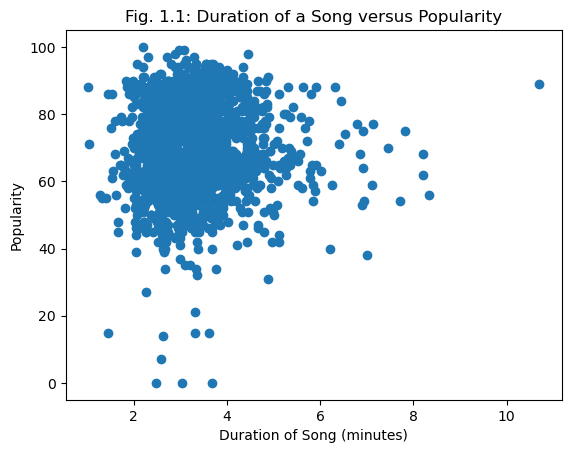

In [27]:
# Plot graph
x = unique_tracks['Duration'] 
y = unique_tracks['Popularity']

plt.scatter(x, y) 

# Add axis labels and title
plt.title('Fig. 1.1: Duration of a Song versus Popularity')
plt.xlabel('Duration of Song (minutes)')
plt.ylabel('Popularity')

In [28]:
mean_x = x.mean().round(2) # Duration
mean_y = y.mean().round() # Popularity
corr = x.corr(y).round(4) # Correlation

print(f'The average time duration of a song is {mean_x} mins')
print(f'The average popularity of a song is {mean_y}')
print(f'The correlation between time duration and popularity is {corr}')

The average time duration of a song is 3.25 mins
The average popularity of a song is 69.0
The correlation between time duration and popularity is 0.0482


Text(0.5, 0, 'Popularity')

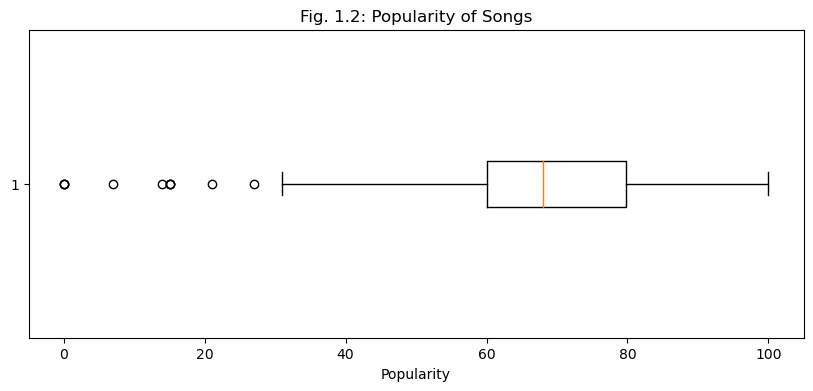

In [29]:
# Box plot for popularity of songs
plt.figure(figsize = (10, 4))
plt.boxplot(unique_tracks['Popularity'], vert = False)

# Add axis labels and title
plt.title('Fig. 1.2: Popularity of Songs')
plt.xlabel('Popularity')

**Top 20 Artists**

In Figure 2, the top 20 artists were determined based on how many of their tracks landed on the Top 50 list on Spotify. It appears that the artist appears to have an influence on which tracks become popular due to several factors, including fan base, brand image, marketing, prior success, artist style and culture [6].

<p style="font-size: x-small">[6] Assisted by ChatGPT: Why does artist impact which song becomes popular</p>

Text(0.5, 1.0, 'Fig. 2: Top 20 Artists')

c:\Users\rosie_bdklw71\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 38515 (\N{CJK UNIFIED IDEOGRAPH-9673}) missing from current font.
  func(*args, **kwargs)
c:\Users\rosie_bdklw71\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 21331 (\N{CJK UNIFIED IDEOGRAPH-5353}) missing from current font.
  func(*args, **kwargs)
c:\Users\rosie_bdklw71\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 36066 (\N{CJK UNIFIED IDEOGRAPH-8CE2}) missing from current font.
  func(*args, **kwargs)
c:\Users\rosie_bdklw71\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38515 (\N{CJK UNIFIED IDEOGRAPH-9673}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rosie_bdklw71\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21331 (\N{CJK UNIFIED IDEOGRAPH-5353}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\rosie_bdkl

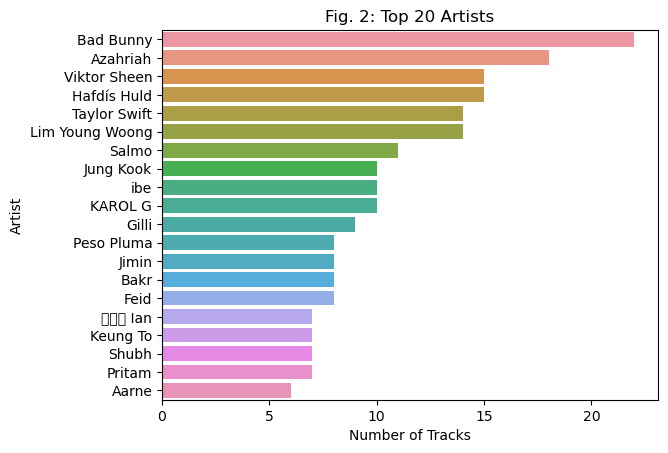

In [30]:
# Plot bar graph
top_artists = unique_tracks['Artist Name'].value_counts().head(20)
sns.barplot(x = top_artists.values, y = top_artists.index)

# Add axis labels and title
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.title('Fig. 2: Top 20 Artists')

**Danceability**

Danceability: A scale from 0.0 (low danceability) to 1.0 (high danceability) based on tempo, rhythm stability, beat strength, and overall regularity [1]

<p style="font-size: x-small" href = "https://www.kaggle.com/datasets/miquelneck/worlds-spotify-top-50-playlist-musicality-data">[1] World's Spotify TOP-50 playlist musicality data</p>

Globally, out of all the unique tracks from 73 countries, they all have an average danceability of 0.68, possibly concluding that a track can be popular due to its danceability. 

In many cultures around the world, music has always been asscoiated with dancing, meaning that most popular songs will be danceable. In Figure 3, for the country with the minimum danceability (IDN), they still had an average danceability of over 0.5. Meanwhile, for the country with the maximum danceability (VEN), they had an average danceability of over 0.8. This can conclude that global listeners have generally similar tastes, culture has an influence on what makes a song popular.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71]),
 [Text(0, 0, 'IDN'),
  Text(1, 0, 'TWN'),
  Text(2, 0, 'GBR'),
  Text(3, 0, 'HKG'),
  Text(4, 0, 'MYS'),
  Text(5, 0, 'USA'),
  Text(6, 0, 'PRY'),
  Text(7, 0, 'ISR'),
  Text(8, 0, 'PAN'),
  Text(9, 0, 'JPN'),
  Text(10, 0, 'CAN'),
  Text(11, 0, 'ARE'),
  Text(12, 0, 'SGP'),
  Text(13, 0, 'HND'),
  Text(14, 0, 'KOR'),
  Text(15, 0, 'THA'),
  Text(16, 0, 'SAU'),
  Text(17, 0, 'SWE'),
  Text(18, 0, 'TUR'),
  Text(19, 0, 'NOR'),
  Text(20, 0, 'PHL'),
  Text(21, 0, 'IRL'),
  Text(22, 0, 'AUS'),
  Text(23, 0, 'Global'),
  Text(24, 0, 'AUT'),
  Text(25, 0, 'IND'),
  Text(26, 0, 'BEL'),
  Text(27, 0, 'BLR'),
  Text(28, 0, 'URY'),
  Text(29, 0, 'BRA'),
  Text(30, 0, 'CR

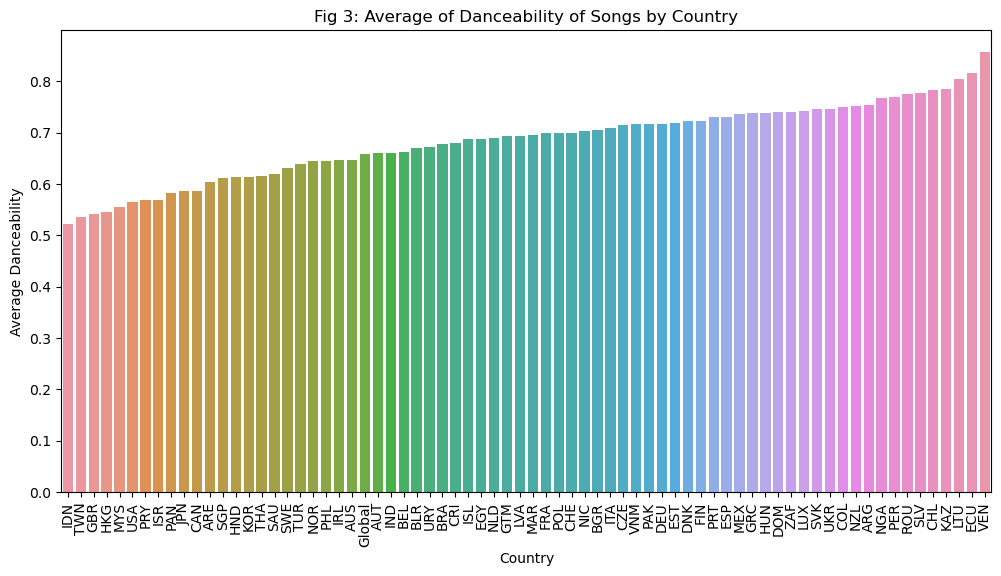

In [31]:
# Group danceability by country
avg_danceability = unique_tracks.groupby('Country')['Danceability'].mean().reset_index()

# Sort by danceability [6]
avg_danceability = avg_danceability.sort_values(by = 'Danceability')

# Plot bar graph
plt.figure(figsize = (12, 6))

x = avg_danceability['Country']
y = avg_danceability['Danceability']
sns.barplot(x = x, y = y)

# Add axis labels and title
plt.title('Fig 3: Average of Danceability of Songs by Country')
plt.xlabel('Country')
plt.ylabel('Average Danceability')

# Format
plt.xticks(rotation = 90)  

<p style="font-size: x-small">[6] Assisted by ChatGPT: Sort values by a certain column pandas</p>

In [32]:
avg_dance = y.mean().round(2)
min_dance = min(y)
max_dance = max(y)

print(f'The total average danceability is {avg_dance}')
print(f'The lowest danceability score is {min_dance}')
print(f'The max danceability score is {max_dance}')

The total average danceability is 0.68
The lowest danceability score is 0.5213571428571429
The max danceability score is 0.8565


**Popular Tracks by Release Year**

Nostalgia plays an important factor in determining the popularity of songs as they can include holidy songs, songs that envoke emotions and sogs that are generational favorites. Upon examning Figure 4, it shows that 27.5% of popular songs were released before 2023, with 15% being before 2022, meaning that nostagia plays a role in making songs popular.

<p style="font-size: x-small">[6] Assisted by ChatGPT: Why are nostalgic songs popular</p>

C:\Users\rosie_bdklw71\AppData\Local\Temp\ipykernel_6832\4202967917.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_counts = sorted_years.append(pd.Series({'2021 and Before': other_years}))


Text(0.5, 1.0, 'Fig. 4: Tracks by Release Year')

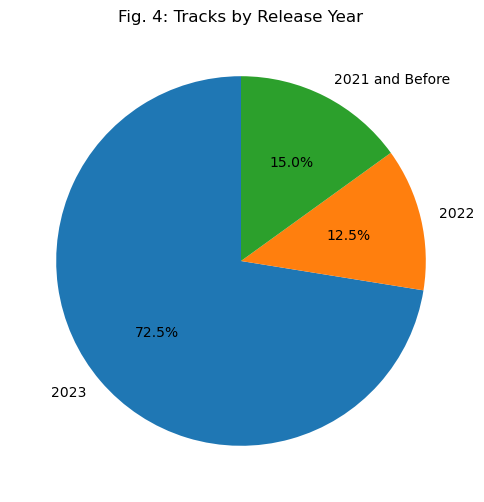

In [33]:
# Gather years
music_data = pd.DataFrame(filtered['Year'])
music_data['Year'] = pd.to_datetime(music_data['Year'], format='%Y').dt.year

# Gather years on unique items
sorted_years = music_data['Year'].value_counts().loc[[2023, 2022]]
other_years = music_data['Year'].value_counts().drop([2023, 2022]).sum()

final_counts = sorted_years.append(pd.Series({'2021 and Before': other_years}))

# Plot pie chart [5]
plt.figure(figsize=(8, 6))
plt.pie(final_counts, labels = final_counts.index, autopct='%1.1f%%', startangle = 90)
plt.title('Fig. 4: Tracks by Release Year')

<p style="font-size: x-small" href = "https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html">[5] Pie charts</p>

**Proportion of Speechiness and Instrumentalness**

Speechiness: Detects exclusive speech without instrumentals in the background, 1.0 is the highest [1]

Instrumentalness: Prediction of no vocals in a song [1]

<p style="font-size: x-small" href = "https://www.kaggle.com/datasets/miquelneck/worlds-spotify-top-50-playlist-musicality-data">[1] World's Spotify TOP-50 playlist musicality data</p>

Upon examining Figure 5.1, the frequency of the unique tracks found in the Top 50 list appear to have little speechiness. However, in Figure 5.2, most of the unique tracks have a high instrumentalness. This can suggest that the songs that would potentially become popular would have more instrumentals than speechiness, meaning that most people appreciate beats versues lyrics in a song.

Text(0, 0.5, 'Frequency')

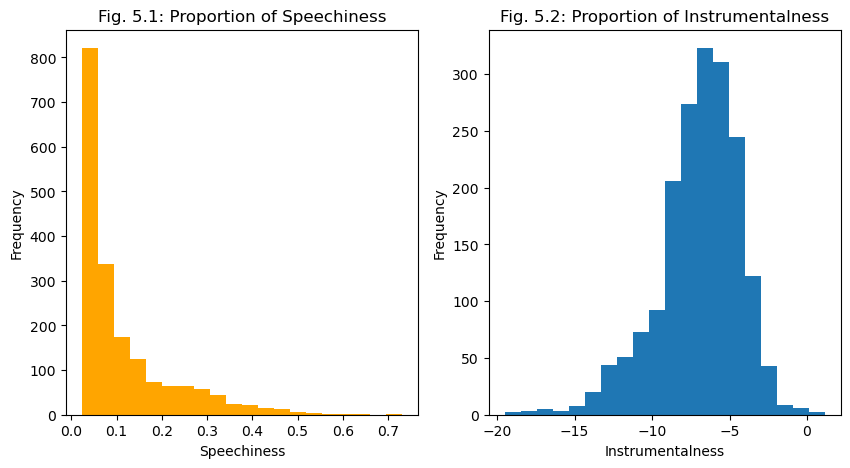

In [34]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.hist(unique_tracks['Speechiness'], bins = 20, color = 'orange')
plt.title('Fig. 5.1: Proportion of Speechiness')
plt.xlabel('Speechiness')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(unique_tracks['Loudness'], bins = 20)
plt.title('Fig. 5.2: Proportion of Instrumentalness')
plt.xlabel('Instrumentalness')
plt.ylabel('Frequency')

### **Discussion**

Upon examining the factors that are are common in popular songs, the most prevelant factors that existed among Spotify's Top50 List globally for the week of Novermber 6-12 is the song artist, year the song was created, speechiness and instrumentalness within a song. The aritst had an impact on popular songs as the same artists had a significant impact on song popularity as certain artists had multiple unique songs that became chart toppers arund the wolrd. Also, the year a song was released had an impact on unique tracks that became popular as over 27% of the popular songs were made before 2023, meaning there may be a nostaliga factor that can make songs popular. Finally as for song acoustics, lower sppechiness and higher instrumentals made songs more popular, suggesting that due to social media such as TikTok made songs with a higher focus on beats more popular.

As for limitations, since only popular songs were used for analysis, there could exist less popular songs with all these factors that still did not become chart toppers. Marketing done by different music labels can play a huge role as many independant artists do not have the capital to advertise their songs or understand factors that make a song appealable to the mass markets. This would also allow an accurate analysis of the duration of a song ctributes to its popularity as it been observed that modern attention spans have decreased significantly.

### **References**

1. Source Data - https://www.kaggle.com/datasets/miquelneck/worlds-spotify-top-50-playlist-musicality-data

2. Popularity Score: https://www.loudlab.org/blog/spotify-popularity-leverage-algorithm/#:~:text=The%20Spotify%20Popularity%20Index%20is,the%20magic%20number%20is%2050!

3. Pandas for data manipulation

4. Seaborn for data visualization

5. Matplotlib for data visualization

6. ChatGPT for code clarification